# Preparar ambiente

In [1]:
!pip install pandas scikit-learn matplotlib

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

random_state = 42

# Informações do dataset

In [3]:
# Contando o número de linhas em cada arquivo CSV
!wc -l dados/*.csv

   1745673 dados/INFLUD21-26-06-2025.csv
    560578 dados/INFLUD22-26-06-2025.csv
    279454 dados/INFLUD23-26-06-2025.csv
    267985 dados/INFLUD24-26-06-2025.csv
         6 dados/populacao_raca_tabela9606.csv
       102 dados/populacao_sexo_tabela9606.csv
         2 dados/populacao_ufs_tabela9606.csv
   2853800 total


In [4]:
# Observando as colunas disponíveis e verificando se os CSVs possuem as mesmas colunas
!head -n 1 dados/INFLUD*.csv | sort | uniq

# O significado de cada coluna pode ser encontrado aqui:
# https://opendatasus.saude.gov.br/dataset/srag-2021-a-2024/resource/3135ac9c-2019-4989-a893-2ed50ebd8e68


==> dados/INFLUD21-26-06-2025.csv <==
==> dados/INFLUD22-26-06-2025.csv <==
==> dados/INFLUD23-26-06-2025.csv <==
==> dados/INFLUD24-26-06-2025.csv <==
"NU_NOTIFIC";"DT_NOTIFIC";"SEM_NOT";"DT_SIN_PRI";"SEM_PRI";"SG_UF_NOT";"ID_REGIONA";"CO_REGIONA";"ID_MUNICIP";"CO_MUN_NOT";"CS_SEXO";"DT_NASC";"NU_IDADE_N";"TP_IDADE";"COD_IDADE";"CS_GESTANT";"CS_RACA";"CS_ETINIA";"CS_ESCOL_N";"ID_PAIS";"CO_PAIS";"SG_UF";"ID_RG_RESI";"CO_RG_RESI";"ID_MN_RESI";"CO_MUN_RES";"CS_ZONA";"NOSOCOMIAL";"AVE_SUINO";"FEBRE";"TOSSE";"GARGANTA";"DISPNEIA";"DESC_RESP";"SATURACAO";"DIARREIA";"VOMITO";"OUTRO_SIN";"OUTRO_DES";"FATOR_RISC";"PUERPERA";"CARDIOPATI";"HEMATOLOGI";"SIND_DOWN";"HEPATICA";"ASMA";"DIABETES";"NEUROLOGIC";"PNEUMOPATI";"IMUNODEPRE";"RENAL";"OBESIDADE";"OBES_IMC";"OUT_MORBI";"MORB_DESC";"TABAG";"VACINA";"DT_UT_DOSE";"MAE_VAC";"DT_VAC_MAE";"M_AMAMENTA";"DT_DOSEUNI";"DT_1_DOSE";"DT_2_DOSE";"ANTIVIRAL";"TP_ANTIVIR";"OUT_ANTIV";"DT_ANTIVIR";"HOSPITAL";"DT_INTERNA";"SG_UF_INTE";"ID_RG_INTE";"CO_RG_INTE

In [2]:
# Ler os arquivos CSV completos resultaria em OOM. Esta utilidade permite selecionar as colunas desejadas:
cols = ["NU_NOTIFIC", "DT_NOTIFIC", "SEM_NOT", "DT_SIN_PRI", "SEM_PRI", "SG_UF_NOT", "ID_REGIONA", "CO_REGIONA", "ID_MUNICIP", "CO_MUN_NOT", "CS_SEXO", "DT_NASC", "NU_IDADE_N", "TP_IDADE", "COD_IDADE", "CS_GESTANT", "CS_RACA", "CS_ETINIA", "CS_ESCOL_N", "ID_PAIS", "CO_PAIS", "SG_UF", "ID_RG_RESI", "CO_RG_RESI", "ID_MN_RESI", "CO_MUN_RES", "CS_ZONA", "NOSOCOMIAL", "AVE_SUINO", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", "SATURACAO", "DIARREIA", "VOMITO", "OUTRO_SIN", "OUTRO_DES", "FATOR_RISC", "PUERPERA", "CARDIOPATI", "HEMATOLOGI", "SIND_DOWN", "HEPATICA", "ASMA", "DIABETES", "NEUROLOGIC", "PNEUMOPATI", "IMUNODEPRE", "RENAL", "OBESIDADE", "OBES_IMC", "OUT_MORBI", "MORB_DESC", "TABAG", "VACINA", "DT_UT_DOSE", "MAE_VAC", "DT_VAC_MAE", "M_AMAMENTA", "DT_DOSEUNI", "DT_1_DOSE", "DT_2_DOSE", "ANTIVIRAL", "TP_ANTIVIR", "OUT_ANTIV", "DT_ANTIVIR", "HOSPITAL", "DT_INTERNA", "SG_UF_INTE", "ID_RG_INTE", "CO_RG_INTE", "ID_MN_INTE", "CO_MU_INTE", "NM_UN_INTE", "UTI", "DT_ENTUTI", "DT_SAIDUTI", "SUPORT_VEN", "RAIOX_RES", "RAIOX_OUT", "DT_RAIOX", "AMOSTRA", "DT_COLETA", "TP_AMOSTRA", "OUT_AMOST", "PCR_RESUL", "DT_PCR", "POS_PCRFLU", "TP_FLU_PCR", "PCR_FLUASU", "FLUASU_OUT", "PCR_FLUBLI", "FLUBLI_OUT", "POS_PCROUT", "PCR_VSR", "PCR_PARA1", "PCR_PARA2", "PCR_PARA3", "PCR_PARA4", "PCR_ADENO", "PCR_METAP", "PCR_BOCA", "PCR_RINO", "PCR_OUTRO", "DS_PCR_OUT", "CLASSI_FIN", "CLASSI_OUT", "CRITERIO", "EVOLUCAO", "DT_EVOLUCA", "DT_ENCERRA", "DT_DIGITA", "HISTO_VGM", "PAIS_VGM", "CO_PS_VGM", "LO_PS_VGM", "DT_VGM", "DT_RT_VGM", "PCR_SARS2", "PAC_COCBO", "PAC_DSCBO", "OUT_ANIM", "DOR_ABD", "FADIGA", "PERD_OLFT", "PERD_PALA", "TOMO_RES", "TOMO_OUT", "DT_TOMO", "TP_TES_AN", "DT_RES_AN", "RES_AN", "POS_AN_FLU", "TP_FLU_AN", "POS_AN_OUT", "AN_SARS2", "AN_VSR", "AN_PARA1", "AN_PARA2", "AN_PARA3", "AN_ADENO", "AN_OUTRO", "DS_AN_OUT", "TP_AM_SOR", "SOR_OUT", "DT_CO_SOR", "TP_SOR", "OUT_SOR", "DT_RES", "RES_IGG", "RES_IGM", "RES_IGA", "POV_CT", "TP_POV_CT", "TEM_CPF", "ESTRANG", "VACINA_COV", "DOSE_1_COV", "DOSE_2_COV", "DOSE_REF", "DOSE_2REF", "DOSE_ADIC", "DOS_RE_BI", "FAB_COV_1", "FAB_COV_2", "FAB_COVRF", "FAB_COVRF2", "FAB_ADIC", "FAB_RE_BI", "LOTE_1_COV", "LOTE_2_COV", "LOTE_REF", "LOTE_REF2", "LOTE_ADIC", "LOT_RE_BI", "FNT_IN_COV", "TRAT_COV", "TIPO_TRAT", "DT_TRT_COV", "OUT_TRAT", "SURTO_SG", "CO_DETEC", "VG_OMS", "VG_OMSOUT", "VG_LIN", "VG_MET", "VG_METOUT", "VG_DTRES", "VG_ENC", "VG_REINF", "VG_CODEST", "REINF"]
def read_selected_columns(selected_cols: list[str]):
    datasets = []
    for file in os.listdir('dados'):
        if file.endswith('.csv') and file.startswith('INFLUD'):
            print(f"Lendo arquivo: {file}")
            df = pd.read_csv(f'dados/{file}', sep=';', usecols=selected_cols)
            # print(df.head())
            datasets.append(df)
    return pd.concat(datasets, ignore_index=True)

# Informações Gerais

In [6]:
# wanted_cols = ["NU_NOTIFIC", "DT_NOTIFIC", "DT_SIN_PRI", "SG_UF_NOT", "ID_REGIONA", "ID_MUNICIP", "CS_SEXO", "DT_NASC", "CS_GESTANT", "CS_RACA", "CS_ESCOL_N", "ID_PAIS", "SG_UF", "ID_RG_RESI", "ID_MN_RESI", "NOSOCOMIAL", "AVE_SUINO", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", "SATURACAO", "DIARREIA", "VOMITO", "OUTRO_SIN", "OUTRO_DES", "FATOR_RISC", "PUERPERA", "CARDIOPATI", "HEMATOLOGI", "SIND_DOWN", "HEPATICA", "ASMA", "DIABETES", "NEUROLOGIC", "PNEUMOPATI", "IMUNODEPRE", "RENAL", "OBESIDADE", "OBES_IMC", "OUT_MORBI", "MORB_DESC", "TABAG", "VACINA", "DT_UT_DOSE", "MAE_VAC", "DT_VAC_MAE", "M_AMAMENTA", "DT_DOSEUNI", "DT_1_DOSE", "DT_2_DOSE", "ANTIVIRAL", "TP_ANTIVIR", "OUT_ANTIV", "DT_ANTIVIR", "HOSPITAL", "DT_INTERNA", "SG_UF_INTE", "ID_RG_INTE", "CO_RG_INTE", "ID_MN_INTE", "CO_MU_INTE", "NM_UN_INTE", "UTI", "DT_ENTUTI", "DT_SAIDUTI", "SUPORT_VEN", "RAIOX_RES", "RAIOX_OUT", "DT_RAIOX", "AMOSTRA", "DT_COLETA", "TP_AMOSTRA", "OUT_AMOST", "PCR_RESUL", "DT_PCR", "POS_PCRFLU", "TP_FLU_PCR", "PCR_FLUASU", "FLUASU_OUT", "PCR_FLUBLI", "FLUBLI_OUT", "POS_PCROUT", "PCR_VSR", "PCR_PARA1", "PCR_PARA2", "PCR_PARA3", "PCR_PARA4", "PCR_ADENO", "PCR_METAP", "PCR_BOCA", "PCR_RINO", "PCR_OUTRO", "DS_PCR_OUT", "CLASSI_FIN", "CLASSI_OUT", "CRITERIO", "EVOLUCAO", "DT_EVOLUCA", "DT_ENCERRA", "DT_DIGITA", "HISTO_VGM", "PAIS_VGM", "CO_PS_VGM", "LO_PS_VGM", "DT_VGM", "DT_RT_VGM", "PCR_SARS2", "PAC_COCBO", "PAC_DSCBO", "OUT_ANIM", "DOR_ABD", "FADIGA", "PERD_OLFT", "PERD_PALA", "TOMO_RES", "TOMO_OUT", "DT_TOMO", "TP_TES_AN", "DT_RES_AN", "RES_AN", "POS_AN_FLU", "TP_FLU_AN", "POS_AN_OUT", "AN_SARS2", "AN_VSR", "AN_PARA1", "AN_PARA2", "AN_PARA3", "AN_ADENO", "AN_OUTRO", "DS_AN_OUT", "TP_AM_SOR", "SOR_OUT", "DT_CO_SOR", "TP_SOR", "OUT_SOR", "DT_RES", "RES_IGG", "RES_IGM", "RES_IGA", "POV_CT", "TP_POV_CT", "TEM_CPF", "ESTRANG", "VACINA_COV", "DOSE_1_COV", "DOSE_2_COV", "DOSE_REF", "DOSE_2REF", "DOSE_ADIC", "DOS_RE_BI", "FAB_COV_1", "FAB_COV_2", "FAB_COVRF", "FAB_COVRF2", "FAB_ADIC", "FAB_RE_BI", "LOTE_1_COV", "LOTE_2_COV", "LOTE_REF", "LOTE_REF2", "LOTE_ADIC", "LOT_RE_BI", "FNT_IN_COV", "TRAT_COV", "TIPO_TRAT", "DT_TRT_COV", "OUT_TRAT", "SURTO_SG", "CO_DETEC", "VG_OMS", "VG_OMSOUT", "VG_LIN", "VG_MET", "VG_METOUT", "VG_DTRES", "VG_ENC", "VG_REINF", "VG_CODEST", "REINF"]
wanted_cols = ["DT_NOTIFIC", "DT_SIN_PRI", "SG_UF_NOT", "CS_SEXO", "NU_IDADE_N", "CS_RACA", "CS_ESCOL_N", "ID_PAIS", "SG_UF"]

df = read_selected_columns(wanted_cols)
df.head()

Lendo arquivo: INFLUD22-26-06-2025.csv
Lendo arquivo: INFLUD21-26-06-2025.csv
Lendo arquivo: INFLUD24-26-06-2025.csv
Lendo arquivo: INFLUD23-26-06-2025.csv


,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
0,2022-03-16,2022-03-16,RJ,M,82,1,9.0,BRASIL,RJ
1,2022-06-06,2022-06-04,SP,F,77,1,1.0,BRASIL,SP
2,2022-07-22,2022-07-15,SP,F,94,1,9.0,BRASIL,SP
3,2022-02-21,2022-02-20,CE,M,73,9,9.0,BRASIL,CE
4,2022-01-11,2022-01-08,CE,F,80,9,9.0,BRASIL,CE


## Limpando o dataframe

In [7]:
cleaned_df = df.copy()

# Linhas com valores NaN
cleaned_df[cleaned_df.isnull().any(axis=1)]

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
6,2022-01-25,2022-01-23,CE,F,97,9,NaN,BRASIL,CE
7,2022-01-29,2022-01-21,CE,F,76,9,NaN,BRASIL,CE
11,2022-01-20,2022-01-15,CE,F,83,9,NaN,BRASIL,CE
12,2022-06-16,2022-06-12,CE,M,87,9,NaN,BRASIL,CE
15,2022-02-09,2022-02-06,CE,M,81,9,NaN,BRASIL,CE
...,...,...,...,...,...,...,...,...,...
2853602,2024-01-03,2023-12-12,RJ,M,69,1,NaN,BRASIL,RJ
2853605,2023-10-05,2023-10-01,GO,M,67,3,NaN,BRASIL,GO
2853650,2023-12-21,2023-12-15,SP,M,0,4,NaN,BRASIL,SP
2853672,2023-03-07,2023-03-07,PB,M,76,4,NaN,BRASIL,PB


In [8]:
# Configurar o padrão para CS_ESCOL_N como 9 (ignorado)
cleaned_df['CS_ESCOL_N'] = cleaned_df['CS_ESCOL_N'].fillna(9)

cleaned_df[cleaned_df.isnull().any(axis=1)]

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
3532,2022-01-07,2022-01-06,NaN,F,60,4,1.0,BRASIL,RO
3990,2022-01-08,2022-01-08,NaN,M,74,4,9.0,BRASIL,RO
6212,2022-01-10,2022-01-05,NaN,F,89,1,0.0,BRASIL,MT
10932,2022-01-07,2022-01-07,NaN,F,59,1,4.0,BRASIL,RJ
12695,2022-01-07,2022-01-03,MS,F,81,4,9.0,BOLIVIA,NaN
...,...,...,...,...,...,...,...,...,...
2834389,2023-12-07,2023-12-06,PR,F,7,1,9.0,VENEZUELA,NaN
2834845,2023-12-08,2023-11-30,PR,M,83,1,9.0,PARAGUAI,NaN
2841650,2023-12-20,2023-12-17,PR,M,77,1,9.0,ARGENTINA,NaN
2841850,2023-11-13,2023-11-13,PA,M,55,1,9.0,UCRANIA,NaN


In [9]:
print("Número de linhas com SG_UF_NOT NaN:", cleaned_df['SG_UF_NOT'].isnull().sum())
print("Número de linhas com SG_UF NaN:", cleaned_df['SG_UF'].isnull().sum())
print("Número de linhas com SG_UF_NOT não NaN e SG_UF NaN:", (cleaned_df['SG_UF_NOT'].isnull() & cleaned_df['SG_UF'].notnull()).sum())

print("Linhas com SG_UF_NOT NaN e SG_UF NaN:")
cleaned_df[cleaned_df['SG_UF_NOT'].isnull() & cleaned_df['SG_UF'].isnull()]

Número de linhas com SG_UF_NOT NaN: 4750
Número de linhas com SG_UF NaN: 532
Número de linhas com SG_UF_NOT não NaN e SG_UF NaN: 4749
Linhas com SG_UF_NOT NaN e SG_UF NaN:


,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
1676866,2021-06-25,2021-05-24,NaN,F,60,4,1.0,BOLIVIA,NaN


In [10]:
# As linhas com SG_UF_NOT NaN e SG_UF NaN serão descartadas
# As linhas onde SG_UF_NOT não é nulo e SG_UF é nulo serão preenchidas com SG_UF_NOT e vice-versa
cleaned_df['SG_UF'] = cleaned_df['SG_UF'].fillna(cleaned_df['SG_UF_NOT'])
cleaned_df['SG_UF_NOT'] = cleaned_df['SG_UF_NOT'].fillna(cleaned_df['SG_UF'])
cleaned_df = cleaned_df.dropna(subset=['SG_UF_NOT', 'SG_UF'])

# Checar o número de linhas com valores nulos após a limpeza
print("Número de linhas com valores nulos após limpeza:")
print(cleaned_df.isnull().sum().sum())

# Checar o dataframe após a limpeza
print("DataFrame limpo:")
cleaned_df

Número de linhas com valores nulos após limpeza:
0
DataFrame limpo:


,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
0,2022-03-16,2022-03-16,RJ,M,82,1,9.0,BRASIL,RJ
1,2022-06-06,2022-06-04,SP,F,77,1,1.0,BRASIL,SP
2,2022-07-22,2022-07-15,SP,F,94,1,9.0,BRASIL,SP
3,2022-02-21,2022-02-20,CE,M,73,9,9.0,BRASIL,CE
4,2022-01-11,2022-01-08,CE,F,80,9,9.0,BRASIL,CE
...,...,...,...,...,...,...,...,...,...
2853681,2025-05-23,2023-05-22,BA,M,28,1,3.0,BRASIL,BA
2853682,2025-05-23,2023-05-20,MG,M,64,1,4.0,BRASIL,MG
2853683,2025-06-11,2023-12-09,MA,M,20,4,9.0,BRASIL,MA
2853684,2025-06-23,2023-06-19,RS,M,76,1,3.0,BRASIL,RS


In [11]:
# Converter DT_NOTIFIC e DT_SIN_PRI para datetime
cleaned_df['DT_NOTIFIC'] = pd.to_datetime(cleaned_df['DT_NOTIFIC'], errors='coerce', format='%Y-%m-%d')
cleaned_df['DT_SIN_PRI'] = pd.to_datetime(cleaned_df['DT_SIN_PRI'], errors='coerce', format='%Y-%m-%d')
cleaned_df

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
0,2022-03-16,2022-03-16,RJ,M,82,1,9.0,BRASIL,RJ
1,2022-06-06,2022-06-04,SP,F,77,1,1.0,BRASIL,SP
2,2022-07-22,2022-07-15,SP,F,94,1,9.0,BRASIL,SP
3,2022-02-21,2022-02-20,CE,M,73,9,9.0,BRASIL,CE
4,2022-01-11,2022-01-08,CE,F,80,9,9.0,BRASIL,CE
...,...,...,...,...,...,...,...,...,...
2853681,2025-05-23,2023-05-22,BA,M,28,1,3.0,BRASIL,BA
2853682,2025-05-23,2023-05-20,MG,M,64,1,4.0,BRASIL,MG
2853683,2025-06-11,2023-12-09,MA,M,20,4,9.0,BRASIL,MA
2853684,2025-06-23,2023-06-19,RS,M,76,1,3.0,BRASIL,RS


## Distribuições demográficas

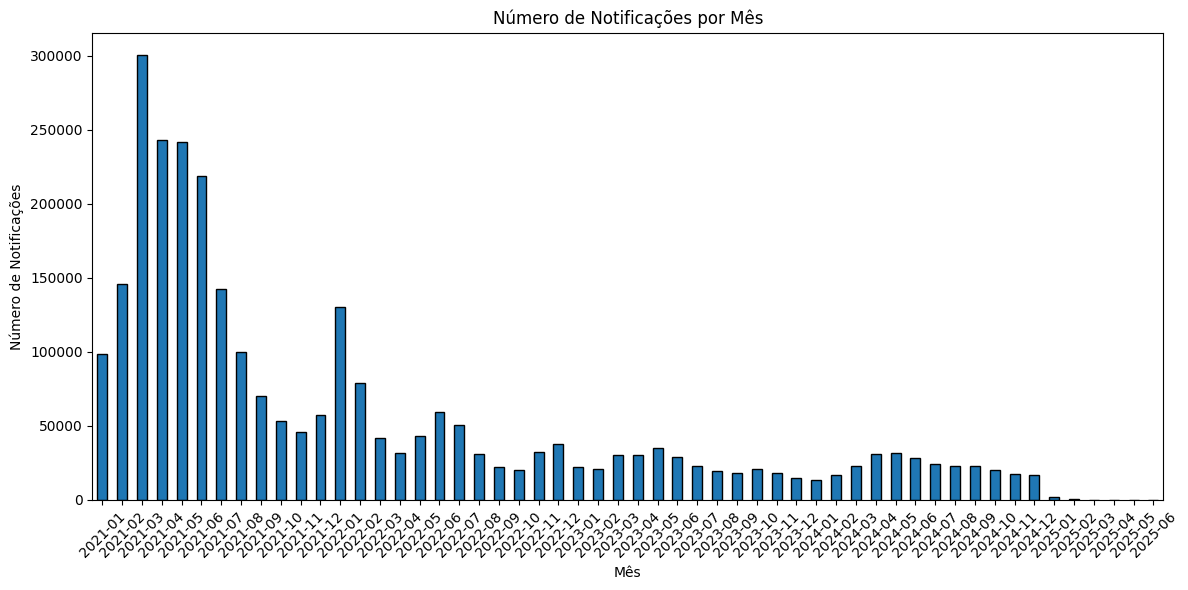

In [12]:
# Distribuição do número de notificações por mês
cleaned_df['month'] = cleaned_df['DT_NOTIFIC'].dt.to_period('M')
monthly_counts = cleaned_df['month'].value_counts().sort_index()

# Plotando a distribuição de notificações por mês
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', edgecolor='black')
plt.title('Número de Notificações por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Notificações')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

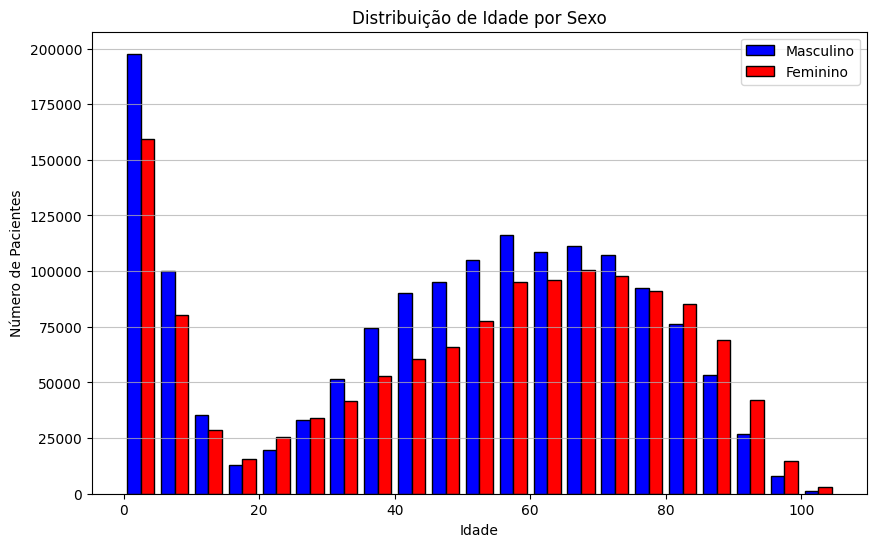

In [13]:
men = cleaned_df[cleaned_df['CS_SEXO'] == 'M']['NU_IDADE_N'].dropna()
women = cleaned_df[cleaned_df['CS_SEXO'] == 'F']['NU_IDADE_N'].dropna()

bins = range(0, 110, 5)  # Faixas de 5 em 5 anos

plt.figure(figsize=(10, 6))
plt.hist([men, women],
         bins=bins,
         label=['Masculino', 'Feminino'],
         color=['blue', 'red'],
         edgecolor='black',
         density=False,
         align='mid')
plt.title('Distribuição de Idade por Sexo')
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

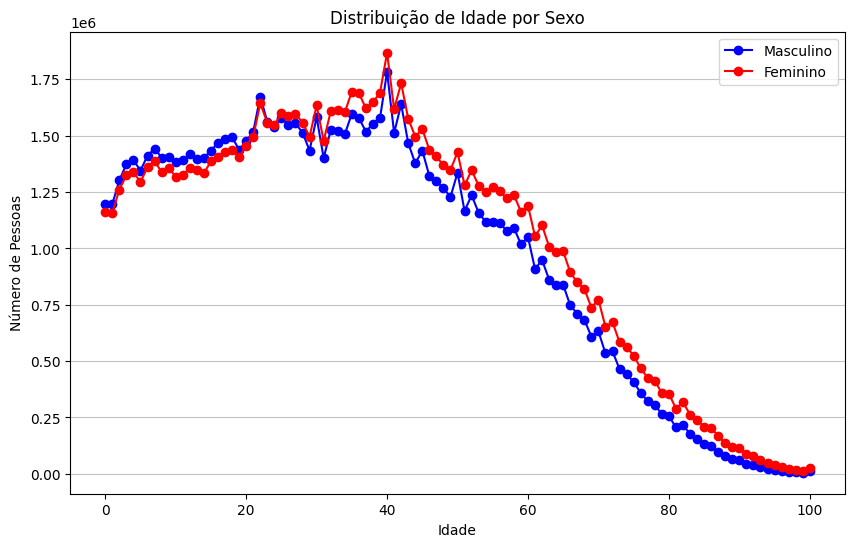

In [14]:
# Comparando a distribuição de idade das notificações com a idade populacional
# Os dados populacionais forma obtidos do IBGE (https://sidra.ibge.gov.br/tabela/9606)
# A url com os parâmetros de query é esta: https://sidra.ibge.gov.br/tabela/9606#/n1/all/v/allxp/p/last%201/c86/95251/c2/all/c287/6557,6558,6559,6560,6561,6562,6563,6564,6565,6566,6567,6568,6569,6570,6571,6572,6573,6574,6575,6576,6577,6578,6579,6580,6581,6582,6583,6584,6585,6586,6587,6588,6589,6590,6591,6592,6593,6594,6595,6596,6597,6598,6599,6600,6601,6602,6603,6604,6605,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615,6616,6617,6618,6619,6620,6621,6622,6623,6624,6625,6626,6627,6628,6629,6630,6631,6632,6633,6634,6635,6636,6637,6638,6639,6640,6641,6642,6643,6644,6645,6646,6647,6648,6649,6650,6651,6652,6653,6656,6657,6658,6659,100362/l/v,p+c86+c2,t+c287/resultado

populacao_df = pd.read_csv('dados/populacao_sexo_tabela9606.csv')
populacao_df

plt.figure(figsize=(10, 6))
plt.plot(populacao_df['Idade'], populacao_df['Homens'], label='Masculino', color='blue', marker='o')
plt.plot(populacao_df['Idade'], populacao_df['Mulheres'], label='Feminino', color='red', marker='o')
plt.title('Distribuição de Idade por Sexo')
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

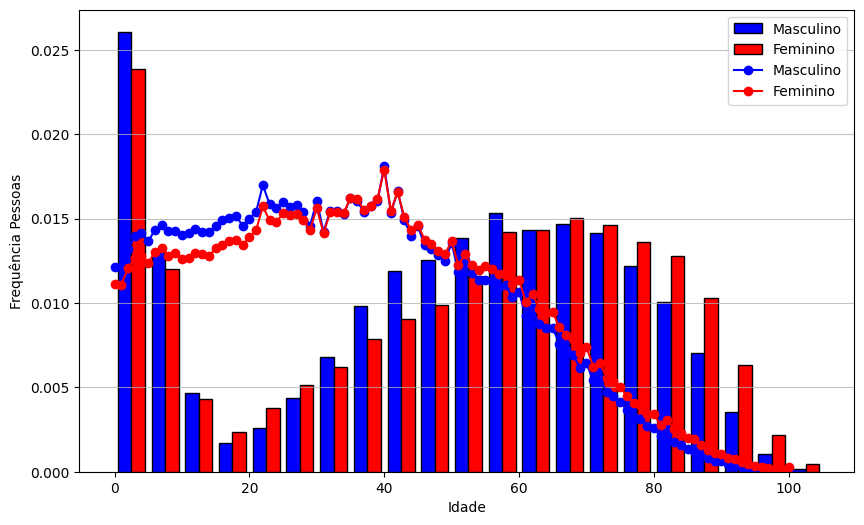

In [15]:
# Comparando a distribuição de idade das notificações com a idade populacional

bins = range(0, 110, 5)  # Faixas de 5 em 5 anos
plt.figure(figsize=(10, 6))
plt.hist([men, women],
         bins=bins,
         label=['Masculino', 'Feminino'],
         color=['blue', 'red'],
         edgecolor='black',
         density=True,
         align='mid')
plt.plot(populacao_df['Idade'], (populacao_df['Homens'] / populacao_df['Homens'].sum()), label='Masculino', color='blue', marker='o')
plt.plot(populacao_df['Idade'], (populacao_df['Mulheres'] / populacao_df['Mulheres'].sum()), label='Feminino', color='red', marker='o')
plt.xlabel('Idade')
plt.ylabel('Frequência Pessoas')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

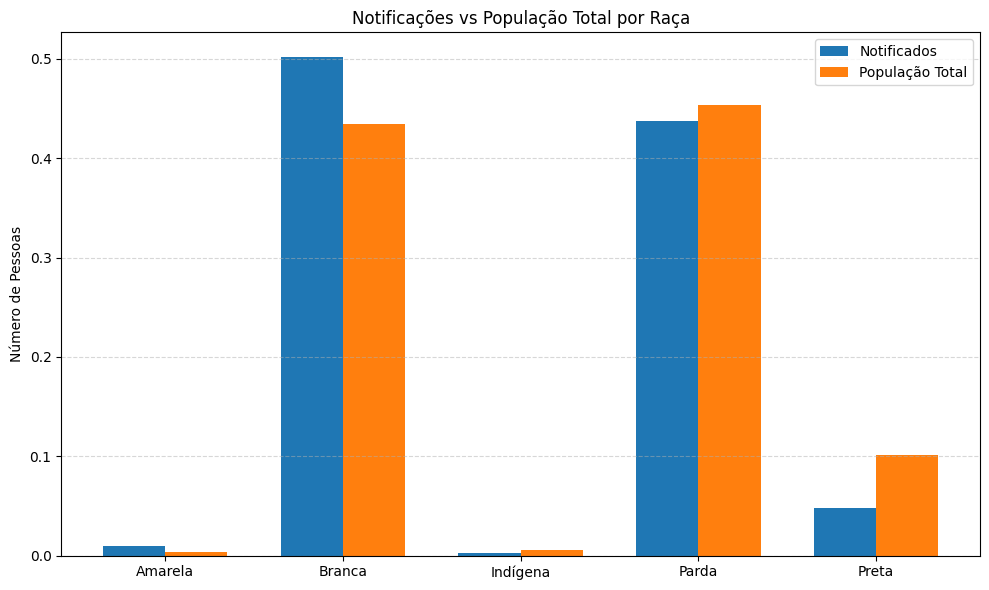

In [16]:
# Distribuição dos dados por raça (notificações)
num_pessoas_por_raca = cleaned_df['CS_RACA'].value_counts()
raca_equivalentes = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
}
num_pessoas_por_raca.index = num_pessoas_por_raca.index.map(raca_equivalentes)
num_pessoas_por_raca = num_pessoas_por_raca.drop('Ignorado')
num_pessoas_por_raca = num_pessoas_por_raca.sort_index()

# Dados populacionais de raça obtidos do IBGE
# https://sidra.ibge.gov.br/tabela/9606#/n1/all/v/allxp/p/last%201/c86/allxt/c2/6794/c287/100362/l/v,p+c86+c2,t+c287/resultado
populacao_raca_df = pd.read_csv('dados/populacao_raca_tabela9606.csv')
populacao_raca_df = populacao_raca_df.sort_values(by='Raca')

# Garantir que ambas as listas estejam na mesma ordem
racas = ['Amarela', 'Branca', 'Indígena', 'Parda', 'Preta']
notificados = num_pessoas_por_raca.reindex(racas)
populacao_total = populacao_raca_df.set_index('Raca').loc[racas, 'Total']

# Plotando o gráfico de barras lado a lado
x = range(len(racas))
largura = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - largura/2 for i in x], notificados / notificados.sum(), width=largura, label='Notificados')
plt.bar([i + largura/2 for i in x], populacao_total / populacao_total.sum(), width=largura, label='População Total')
plt.xticks(ticks=x, labels=racas)
plt.ylabel('Número de Pessoas')
plt.title('Notificações vs População Total por Raça')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

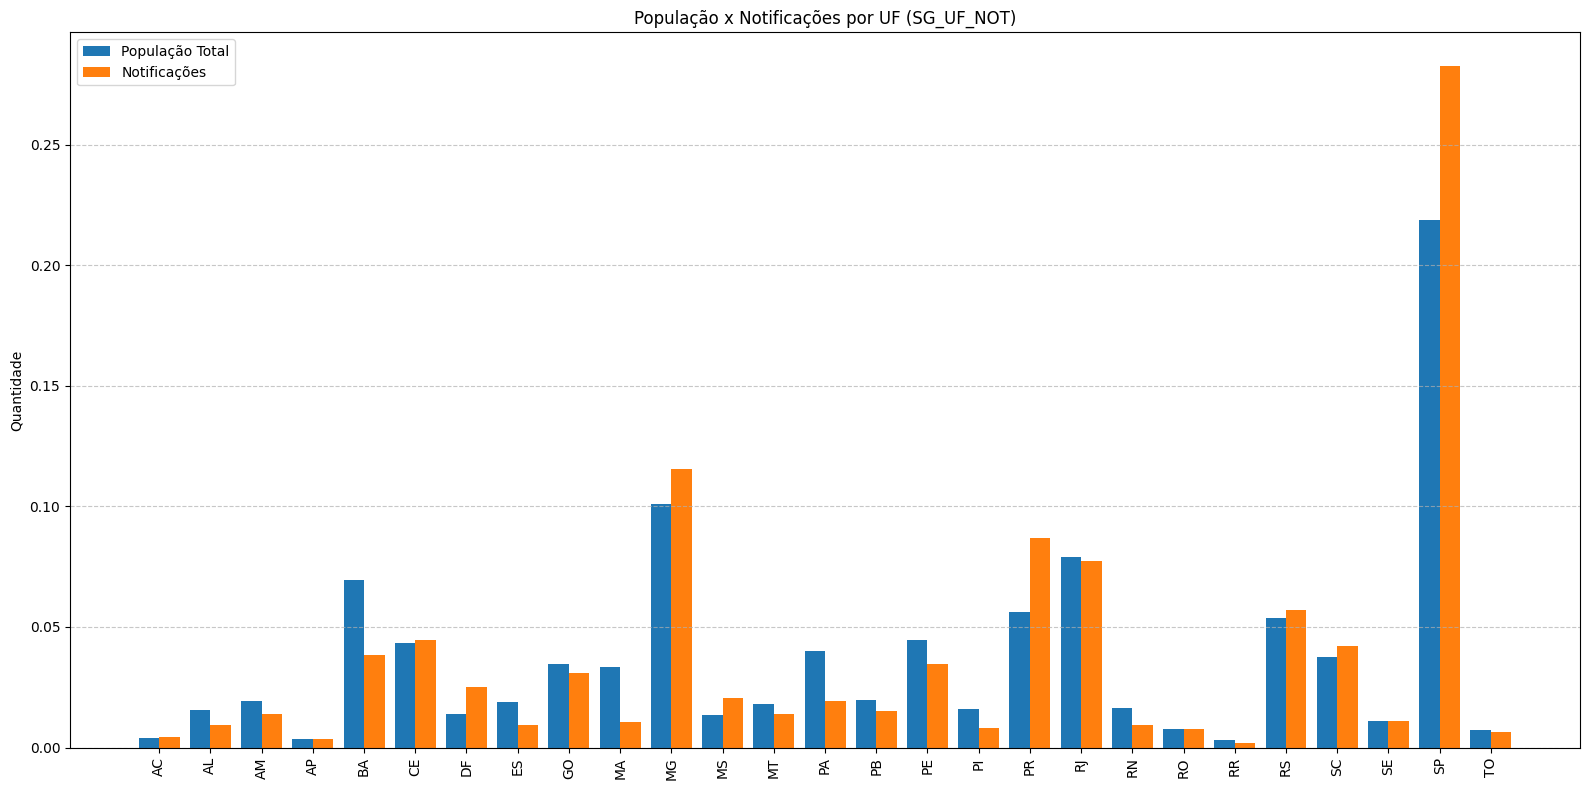

In [17]:
# Distribuição dos dados por UF/Região usando o estado da notificação
uf_df = cleaned_df['SG_UF_NOT'].value_counts().sort_index().copy()

# Dados populacionais obtidos do IBGE
# https://sidra.ibge.gov.br/tabela/9606#/n3/all/v/allxp/p/last%201/c86/95251/c2/6794/c287/100362/l/,t+p+c86+c2,c287+v/resultado
populacao_uf_df = pd.read_csv('dados/populacao_ufs_tabela9606.csv', header=None)
populacao_uf_df = populacao_uf_df.T
populacao_uf_df.columns = ['UF', 'Total']
populacao_uf_df = populacao_uf_df.drop(index=0)

# Mapeamento de nomes por extenso para siglas
nome_para_sigla = {
    'Rondônia': 'RO', 'Acre': 'AC', 'Amazonas': 'AM', 'Roraima': 'RR',
    'Pará': 'PA', 'Amapá': 'AP', 'Tocantins': 'TO', 'Maranhão': 'MA',
    'Piauí': 'PI', 'Ceará': 'CE', 'Rio Grande do Norte': 'RN', 'Paraíba': 'PB',
    'Pernambuco': 'PE', 'Alagoas': 'AL', 'Sergipe': 'SE', 'Bahia': 'BA',
    'Minas Gerais': 'MG', 'Espírito Santo': 'ES', 'Rio de Janeiro': 'RJ',
    'São Paulo': 'SP', 'Paraná': 'PR', 'Santa Catarina': 'SC', 'Rio Grande do Sul': 'RS',
    'Mato Grosso do Sul': 'MS', 'Mato Grosso': 'MT', 'Goiás': 'GO', 'Distrito Federal': 'DF'
}

# Remover possíveis espaços em branco
populacao_uf_df['UF'] = populacao_uf_df['UF'].str.strip()

# Adiciona a coluna com sigla
populacao_uf_df['UF_sigla'] = populacao_uf_df['UF'].map(nome_para_sigla)

# Converte a coluna 'Total' para inteiro
populacao_uf_df['Total'] = populacao_uf_df['Total'].astype(int)

# Transformar a Series de notificações em DataFrame
notificacoes_df = uf_df.reset_index()
notificacoes_df.columns = ['UF_sigla', 'Notificações']

# Merge: população + notificações
merged_df = pd.merge(populacao_uf_df, notificacoes_df, on='UF_sigla')

# Ordena por UF_sigla para manter coerência visual
merged_df = merged_df.sort_values('UF_sigla')

# Plot
x = np.arange(len(merged_df))
largura = 0.4

plt.figure(figsize=(16, 8))
plt.bar(x - largura/2, merged_df['Total'] / merged_df['Total'].sum(), width=largura, label='População Total')
plt.bar(x + largura/2, merged_df['Notificações'] / merged_df['Notificações'].sum(), width=largura, label='Notificações')

plt.xticks(x, merged_df['UF_sigla'], rotation=90)
plt.ylabel('Quantidade')
plt.title('População x Notificações por UF (SG_UF_NOT)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Casos relatados

In [3]:
# descricao - Campos de identificação do momento da notificação e características do paciente.
# Para descrição do lugar será considerado a UF de residência e de notificação apenas.
# Sobre o paciente, não será considerada a etnia se for indígena.
descricao = ["DT_NOTIFIC", "DT_SIN_PRI", "SG_UF_NOT", "CS_SEXO", "NU_IDADE_N", "CS_GESTANT",
             "CS_RACA", "CS_ESCOL_N", "PAC_COCBO", "PAC_DSCBO", "SG_UF", "CS_ZONA", "NOSOCOMIAL", "AVE_SUINO"]

# sintomas - Sintomas relatados pelo paciente.
sintomas = ["FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", "SATURACAO", "DIARREIA", "VOMITO", "DOR_ABD", "FADIGA", "PERD_OLFT", "PERD_PALA"]

# fatores_risco - Fatores de risco do paciente.
fatores_risco = ["FATOR_RISC", "PUERPERA", "CARDIOPATI", "HEMATOLOGI", "SIND_DOWN", "HEPATICA", "ASMA", "DIABETES",
                 "NEUROLOGIC", "PNEUMOPATI", "IMUNODEPRE", "RENAL", "OBESIDADE", "OBES_IMC", "TABAG"]

# vacinas - Informações sobre vacinas de covid recebidas pelo paciente. Não será analisado o lote da vacina.
vacinacao_covid = ["VACINA_COV", "DOSE_1_COV", "DOSE_2_COV", "DOSE_REF", "DOSE_2REF"]

# fabricante_vacinas_covid - Informações sobre o fabricante da vacina de covid recebida pelo paciente. Não será usado na análise.
# fabricante_vacinas_covid = ["FAB_COV_1", "FAB_COV_2", "FAB_COVRF", "FAB_COVRF2"]

# A análise irá se restringir a adultos.
# Não será analisado o efeito da vacinação em crianças de 6 meses a 8 anos nem a influência da vacinação em gestantes e da amamentação.
vacinacao_gripe = ["VACINA", "DT_UT_DOSE"]

# tratamento - Informações sobre tratamento do paciente.
tratamento = ["ANTIVIRAL", "TP_ANTIVIR", "DT_ANTIVIR", "TRAT_COV", "TIPO_TRAT", "DT_TRT_COV"]

# internacao - Informações sobre internação do paciente. Não será observado o município de internação, apenas a UF.
internacao = ["DT_INTERNA", "SG_UF_INTE", "UTI", "DT_ENTUTI", "DT_SAIDUTI", "SUPORT_VEN"]

# exames - Informações sobre exames realizados pelo paciente.
# Como o resultado do RAIOX é textual, será analisado apenas se foi realizado. O mesmo é feito para outros exames.
exames = ["RAIOX_RES", "DT_RAIOX", "TOMO_RES", "DT_TOMO", "AMOSTRA", "DT_COLETA", "TP_AMOSTRA", "TP_TES_AN", "DT_RES_AN", "RES_AN",
          "POS_AN_FLU", "TP_FLU_AN", "POS_AN_OUT", "AN_SARS2", "AN_VSR", "AN_PARA1", "AN_PARA2", "AN_PARA3", "AN_ADENO", "AN_OUTRO",
          "PCR_RESUL", "DT_PCR", "POS_PCRFLU", "TP_FLU_PCR", "PCR_FLUASU", "PCR_FLUBLI", "POS_PCROUT", "PCR_VSR", "PCR_PARA1", "PCR_PARA2",
          "PCR_PARA3", "PCR_PARA4", "PCR_ADENO", "PCR_METAP", "PCR_BOCA", "PCR_RINO", "PCR_OUTRO", "TP_AM_SOR", "DT_CO_SOR",
          "TP_SOR", "RES_IGG", "RES_IGM", "RES_IGA", "DT_RES"]

# classificacao - Informações sobre a classificação do caso.
classificacao = ["CLASSI_FIN", "CRITERIO", "EVOLUCAO", "DT_EVOLUCA", "DT_ENCERRA"]

## Clusterização das doenças por sintomas

In [4]:
cluster_df = read_selected_columns([*sintomas, "CLASSI_FIN"])
print(cluster_df['CLASSI_FIN'].value_counts())
print(f"Num NaN: {cluster_df['CLASSI_FIN'].isnull().sum()}")
cluster_df

Lendo arquivo: INFLUD22-26-06-2025.csv
Lendo arquivo: INFLUD21-26-06-2025.csv
Lendo arquivo: INFLUD24-26-06-2025.csv
Lendo arquivo: INFLUD23-26-06-2025.csv
CLASSI_FIN
5.0    1546687
4.0     939095
2.0     168029
1.0      65901
3.0      17463
Name: count, dtype: int64
Num NaN: 116511


,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,CLASSI_FIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN
1,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN
2,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,5.0,NaN,1.0,NaN,NaN
3,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
4,1.0,NaN,2.0,1.0,1.0,1.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853681,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0
2853682,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0
2853683,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2853684,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0


In [5]:
# Excluindo os casos sem classificação final
cluster_df = cluster_df.drop(cluster_df[cluster_df['CLASSI_FIN'].isnull()].index)

# Assumindo que sintomas ignorados (NaN ou 9.0) são considerados como não tendo o sintoma
cluster_df = cluster_df.fillna(2.0)
cluster_df = cluster_df.replace(9.0, 2.0)
cluster_df

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,CLASSI_FIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,5.0,2.0,1.0,2.0,2.0
3,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0
4,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853678,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0
2853679,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0
2853680,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0
2853682,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0


In [7]:
resultados = []

for sintoma in sintomas:
    # Tabela de contingência entre presença do sintoma e a classificação final
    tabela = pd.crosstab(cluster_df[sintoma], cluster_df['CLASSI_FIN'])
    # print(tabela)
    
    # Teste do qui-quadrado
    chi2, p, dof, expected = chi2_contingency(tabela)
    
    resultados.append({
        'sintoma': sintoma,
        'p_valor': p,
        'qui_quadrado': chi2,
        'dof': dof,
    })

# Exibir resultados ordenados pelo menor p-valor
resultado_df = pd.DataFrame(resultados).sort_values(by='p_valor')
resultado_df

,sintoma,p_valor,qui_quadrado,dof
0,FEBRE,0.0,21133.588893,4
1,TOSSE,0.0,29583.732989,4
2,GARGANTA,0.0,23121.296610,4
3,DISPNEIA,0.0,8513.408478,4
4,DESC_RESP,0.0,17252.835577,4
5,SATURACAO,0.0,26956.959745,4
6,DIARREIA,0.0,10619.991963,4
7,VOMITO,0.0,7734.904745,4
8,DOR_ABD,0.0,1538.730079,4
9,FADIGA,0.0,37434.850372,4


O Teste Estatístico de Qui-Quadrado mostrou que todos os sintomas relatados tem influência estatística sobre a classificação final.

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cluster_df[sintomas])

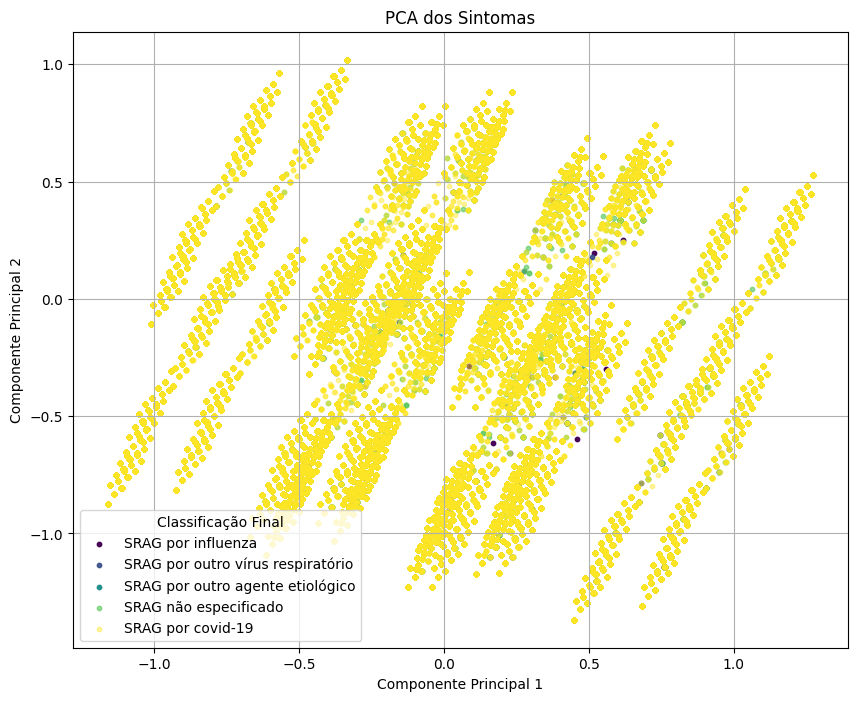

In [ ]:
class_count = cluster_df['CLASSI_FIN'].value_counts()
total = class_count.sum()

# Mapeamento da classificação
class_map = {
    1: 'SRAG por influenza',
    2: 'SRAG por outro vírus respiratório',
    3: 'SRAG por outro agente etiológico',
    4: 'SRAG não especificado',
    5: 'SRAG por covid-19'
}

# Cores para cada classe
colors = plt.cm.viridis(np.linspace(0, 1, len(class_map)))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(10, 8))

for i, (class_code, label) in enumerate(class_map.items()):
    mask = cluster_df['CLASSI_FIN'] == class_code
    plt.scatter(
        pca_result[mask, 0], 
        pca_result[mask, 1], 
        label=label, 
        alpha=(1 -class_count[class_code] / total),
        s=10,
        color=colors[i]
    )

plt.title('PCA dos Sintomas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Classificação Final')
plt.grid()
plt.show()

Apesar dos sintomas serem estatisticamente relevantes, a clusterização com PCA usando apenas eles como dados não revelou informações úteis. A covid que tem mais casos tomou todo o gráfico e as outras classificações ficaram espalhadas sem padrão visível.

Este resultado é um indício de que as classificações no espaço de sintomas não são linearmente separáveis.

In [18]:
amostra_df = cluster_df.sample(frac=0.01, random_state=random_state)

X_trainval, X_test, y_trainval, y_test = train_test_split(
    amostra_df[sintomas], amostra_df['CLASSI_FIN'], test_size=0.3, random_state=random_state, stratify=amostra_df['CLASSI_FIN']
)

[KNN] Acurácia fold 1: 0.5391
[KNN] Acurácia fold 2: 0.5162
[KNN] Acurácia fold 3: 0.5418
[KNN] Acurácia fold 4: 0.5219
[KNN] Acurácia fold 5: 0.5125
[KNN] Acurácia fold 6: 0.5151
[KNN] Acurácia fold 7: 0.5402
[KNN] Acurácia fold 8: 0.5245
[KNN] Acurácia fold 9: 0.5287
[KNN] Acurácia fold 10: 0.5318
[KNN] Acurácia final: 0.5272 ± 0.0103
[KNN] Acurácia no conjunto de teste: 0.5181


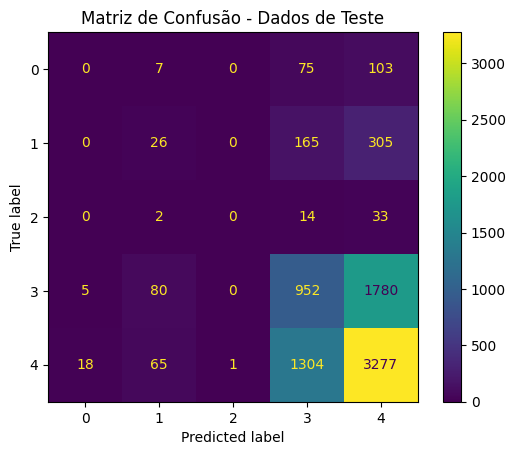

In [28]:
# Validação cruzada
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_trainval, y_trainval, cv=10, scoring='accuracy')

for i, score in enumerate(scores):
    print(f"[KNN] Acurácia fold {i+1}: {score:.4f}")
print(f"[KNN] Acurácia final: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Treino com dados completos (no knn não há aprendizado de parametros)
knn.fit(X_trainval, y_trainval)

# Teste
y_pred = knn.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(f"[KNN] Acurácia no conjunto de teste: {acc_test:.4f}")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Matriz de Confusão - Dados de Teste")
plt.show()

[Árvore] Acurácia fold 1: 0.5585
[Árvore] Acurácia fold 2: 0.5642
[Árvore] Acurácia fold 3: 0.5720
[Árvore] Acurácia fold 4: 0.5652
[Árvore] Acurácia fold 5: 0.5647
[Árvore] Acurácia fold 6: 0.5616
[Árvore] Acurácia fold 7: 0.5585
[Árvore] Acurácia fold 8: 0.5564
[Árvore] Acurácia fold 9: 0.5595
[Árvore] Acurácia fold 10: 0.5663
[Árvore] Acurácia final: 0.5627 ± 0.0045
[Árvore] Acurácia no conjunto de teste: 0.5611



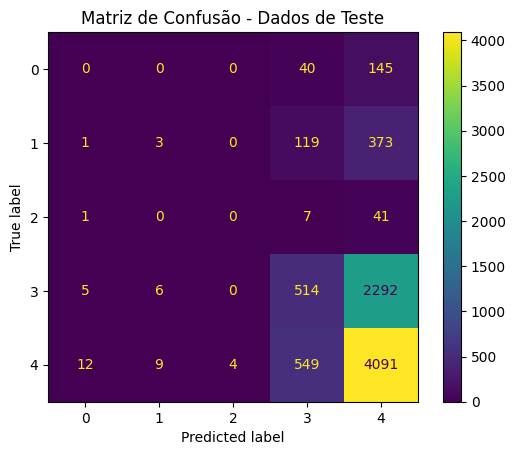

In [29]:
dt = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(dt, X_trainval, y_trainval, cv=10, scoring='accuracy')

for i, score in enumerate(scores):
    print(f"[Árvore] Acurácia fold {i+1}: {score:.4f}")
print(f"[Árvore] Acurácia final: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

dt.fit(X_trainval, y_trainval)
y_pred = dt.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(f"[Árvore] Acurácia no conjunto de teste: {acc_test:.4f}\n")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Matriz de Confusão - Dados de Teste")
plt.show()

[SVM] Acurácia fold 1: 0.5741
[SVM] Acurácia fold 2: 0.5736
[SVM] Acurácia fold 3: 0.5819
[SVM] Acurácia fold 4: 0.5715
[SVM] Acurácia fold 5: 0.5814
[SVM] Acurácia fold 6: 0.5783
[SVM] Acurácia fold 7: 0.5705
[SVM] Acurácia fold 8: 0.5819
[SVM] Acurácia fold 9: 0.5825
[SVM] Acurácia fold 10: 0.5825
[SVM] Acurácia final: 0.5778 ± 0.0046
[SVM] Acurácia no conjunto de teste: 0.5782



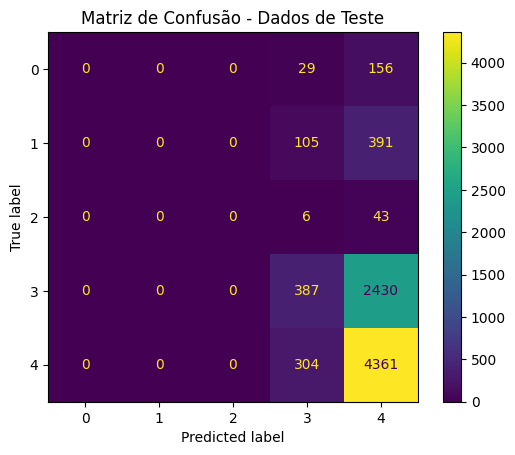

In [30]:
svm = LinearSVC(max_iter=10000, random_state=42)
scores = cross_val_score(svm, X_trainval, y_trainval, cv=10, scoring='accuracy')

for i, score in enumerate(scores):
    print(f"[SVM] Acurácia fold {i+1}: {score:.4f}")
print(f"[SVM] Acurácia final: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

svm.fit(X_trainval, y_trainval)
y_pred = svm.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(f"[SVM] Acurácia no conjunto de teste: {acc_test:.4f}\n")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Matriz de Confusão - Dados de Teste")
plt.show()

[Naive Bayes] Acurácia fold 1: 0.3111
[Naive Bayes] Acurácia fold 2: 0.3497
[Naive Bayes] Acurácia fold 3: 0.3481
[Naive Bayes] Acurácia fold 4: 0.3810
[Naive Bayes] Acurácia fold 5: 0.3267
[Naive Bayes] Acurácia fold 6: 0.3210
[Naive Bayes] Acurácia fold 7: 0.3450
[Naive Bayes] Acurácia fold 8: 0.3664
[Naive Bayes] Acurácia fold 9: 0.3622
[Naive Bayes] Acurácia fold 10: 0.3366
[Naive Bayes] Acurácia final: 0.3448 ± 0.0205
[Naive Bayes] Acurácia no conjunto de teste: 0.3388



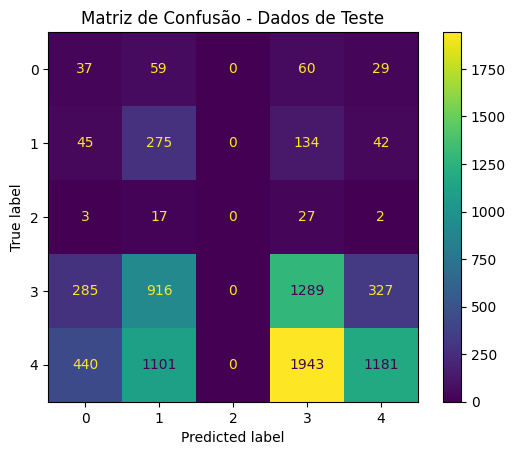

In [31]:
nb = GaussianNB()
scores = cross_val_score(nb, X_trainval, y_trainval, cv=10, scoring='accuracy')

for i, score in enumerate(scores):
    print(f"[Naive Bayes] Acurácia fold {i+1}: {score:.4f}")
print(f"[Naive Bayes] Acurácia final: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

nb.fit(X_trainval, y_trainval)
y_pred = nb.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(f"[Naive Bayes] Acurácia no conjunto de teste: {acc_test:.4f}\n")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Matriz de Confusão - Dados de Teste")
plt.show()

# Classificação de gravidade